## New packages 
```pip install pandas```

```pip install statsmodels```

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
import statsmodels.api as sm

## UCI Bike Sharing Dataset
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Importing Data

In [ ]:
bikes = np.genfromtxt("Data/bikedc.csv", delimiter=',', skip_header=1)

In [ ]:
bikes=pd.read_csv("Data/bikedc.csv")

In [5]:
bikes

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,365,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,12,365,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,12,365,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,12,365,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,36,38


In [6]:
np.unique(bikes["mnth"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## Data Wrangling

In [ ]:
print(bikes.head())

In [7]:
print(bikes.describe())

            season         mnth         day           hr      holiday  \
count  8645.000000  8645.000000  8645.00000  8645.000000  8645.000000   
mean      2.513592     6.573973   184.39572    11.573626     0.027646   
std       1.105477     3.428147   104.82334     6.907822     0.163966   
min       1.000000     1.000000     1.00000     0.000000     0.000000   
25%       2.000000     4.000000    94.00000     6.000000     0.000000   
50%       3.000000     7.000000   185.00000    12.000000     0.000000   
75%       3.000000    10.000000   275.00000    18.000000     0.000000   
max       4.000000    12.000000   365.00000    23.000000     1.000000   

           weekday   workingday   weathersit         temp       atemp  \
count  8645.000000  8645.000000  8645.000000  8645.000000  8645.00000   
mean      3.012724     0.683748     1.437594     0.489069     0.46900   
std       2.006370     0.465040     0.653859     0.197943     0.17676   
min       0.000000     0.000000     1.000000     0

In [8]:
np.unique(bikes['cnt'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

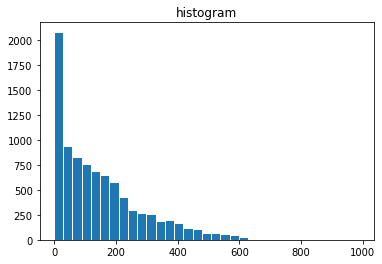

In [9]:
binblock=np.arange(0, 1000, 30)
plt.hist(bikes['cnt'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

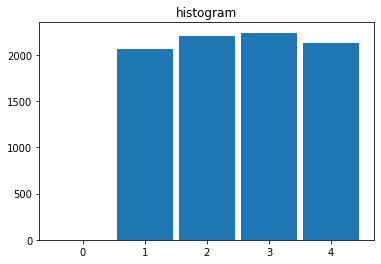

In [10]:
np.unique(bikes['season'])
binblock=np.arange(-0.5, 5, 1)
plt.hist(bikes['season'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

In [ ]:
np.unique(bikes['season'])
binblock=np.arange(-0.5, 5, 1)
plt.hist(bikes['season'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

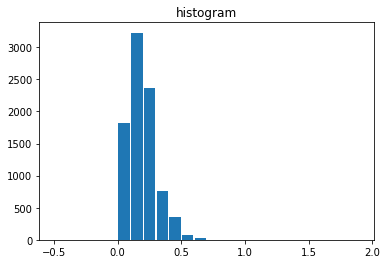

In [11]:
np.unique(bikes['windspeed'])
binblock=np.arange(-0.5, 2, 0.1)
plt.hist(bikes['windspeed'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

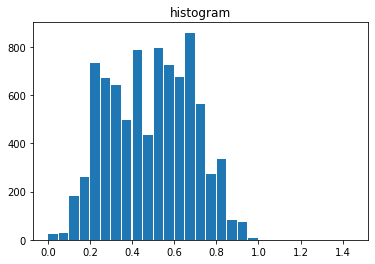

In [12]:
binblock=np.arange(0, 1.5, 0.05)
plt.hist(bikes['temp'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

# Data Visualization 

### Scatter Plots & Data Aggregation

- ### Weekday

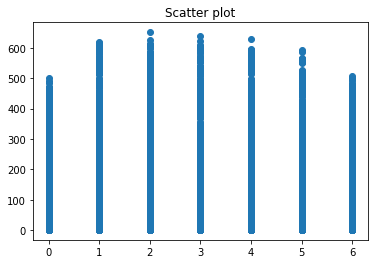

In [13]:
plt.scatter(bikes['weekday'], bikes['cnt'])
plt.title('Scatter plot')
plt.show()

In [14]:
bikes_weekday=bikes[['cnt','weekday']].groupby('weekday').mean().reset_index()
bikes_weekday

,weekday,cnt
0,0,143.845654
1,1,145.927935
2,2,147.576105
3,3,137.647681
4,4,142.491429
5,5,146.897498
6,6,142.201741


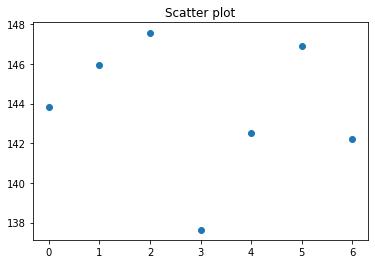

In [15]:
plt.scatter(bikes_weekday['weekday'], bikes_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

- ### Weathersit

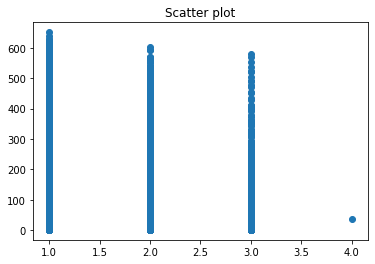

In [16]:
plt.scatter(bikes['weathersit'], bikes['cnt'])
plt.title('Scatter plot')
plt.show()

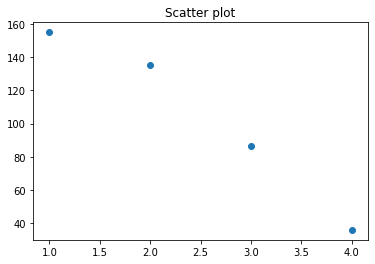

In [17]:
bikes_weekday=bikes[['cnt','weathersit']].groupby('weathersit').mean().reset_index()
plt.scatter(bikes_weekday['weathersit'], bikes_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

In [ ]:
bikes_weekday=bikes[['cnt','weathersit']].groupby('weathersit').mean().reset_index()
plt.scatter(bikes_weekday['weathersit'], bikes_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

- ### Holiday

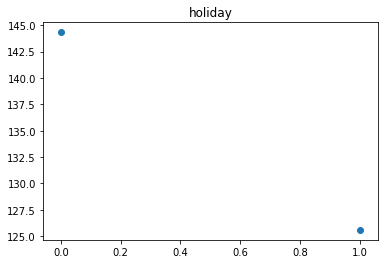

In [18]:
bikes_weekday=bikes[['cnt','holiday']].groupby('holiday').mean().reset_index()
plt.scatter(bikes_weekday['holiday'], bikes_weekday['cnt'])
plt.title('holiday')
plt.show()

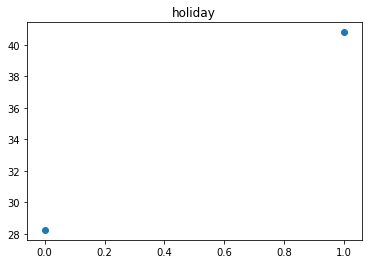

In [19]:
bikes_weekday=bikes[['casual','holiday']].groupby('holiday').mean().reset_index()
plt.scatter(bikes_weekday['holiday'], bikes_weekday['casual'])
plt.title('holiday')
plt.show()

- ### Workingday

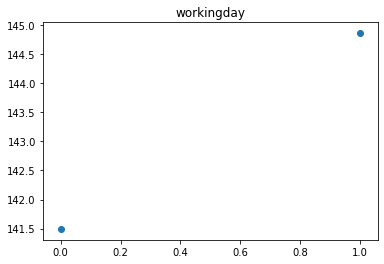

In [20]:
bikes_weekday=bikes[['cnt','workingday']].groupby('workingday').mean().reset_index()
plt.scatter(bikes_weekday['workingday'], bikes_weekday['cnt'])
plt.title('workingday')
plt.show()

- ### temp

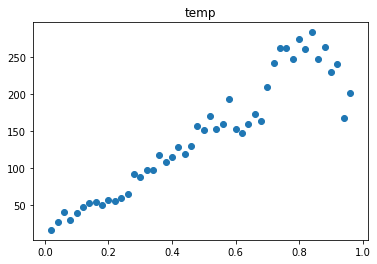

In [21]:
bikes_weekday=bikes[['cnt','temp']].groupby('temp').mean().reset_index()
plt.scatter(bikes_weekday['temp'], bikes_weekday['cnt'])
plt.title('temp')
plt.show()

## Modeling

- ## First try

In [ ]:
X=bikes[['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y=bikes['cnt']

X=sm.add_constant(X)

In [ ]:
X

In [ ]:
bike_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model.summary())

## Model Interpretation

- #### How do you interpreting the $\beta$s?
- #### p-value and statistic significance

In [ ]:
np.exp(np.dot(bike_model.params,X.iloc[0]))

In [ ]:
bike_model.params

In [ ]:
ypred1st=bike_model.predict(X)
bikes['ypred1st']=ypred1st

In [ ]:
bikes['ypred1st']

In [ ]:
X[0:1]

#### Interpreting $\beta_{temp}=0.3238$

In [ ]:
bikes.plot(x='temp', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp scatter')
plt.show()

In [ ]:
bikes_agg=bikes[['ypred1st','cnt', 'temp']].groupby('temp').mean().reset_index()

bikes_agg.plot(x='temp', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp')
plt.show()

#### Interpreting $\beta_{holiday}=-0.1220$

In [ ]:
bikes.plot(x='holiday', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('holiday scatter')
plt.xlim([-0.5,1.5])
plt.show()

In [ ]:
bikes_agg=bikes[['ypred1st','cnt', 'holiday']].groupby('holiday').mean().reset_index()
bikes_agg.plot(x='holiday', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim([-0.5,1.5])
plt.title('holiday')
plt.show()

#### Interpreting $\beta_{mnth}=0.0573$

In [ ]:
bikes_agg=bikes[['ypred1st','cnt', 'mnth']].groupby('mnth').mean().reset_index()
bikes_agg.plot(x='mnth', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim([-0.5,12.5])
plt.title('mnth')
plt.show()

In [ ]:
bikes_agg=bikes[['ypred1st','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim([-0.5,12.5])
plt.title('weekday')
plt.show()

## Second Try with Feature Engineering

- ### Polynomial transformation

In [ ]:
bikes['tempsquare']=np.power(bikes['temp'], 6)

In [ ]:
X=bikes[['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'tempsquare']]
y=bikes['cnt']

In [ ]:
X=sm.add_constant(X)
bike_model2 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model2.summary())

In [ ]:
ypred2nd=bike_model2.predict(X)
bikes['ypred2nd']=ypred2nd

In [ ]:
bikes_agg=bikes[['ypred2nd','cnt', 'temp']].groupby('temp').mean().reset_index()

bikes_agg.plot(x='temp', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp')
plt.show()

In [ ]:
bikes_agg=bikes[['ypred2nd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

- ### One Hot Encoding

In [ ]:
bikes.columns

In [ ]:
bikes['weekdaystr']=bikes['weekday'].astype(str)

In [ ]:
one_hot = pd.get_dummies(bikes['weekdaystr'])

In [ ]:
bikes = bikes.drop('weekdaystr',axis = 1)
bikes = bikes.join(one_hot)

In [ ]:
bikes

In [ ]:
X=bikes[['season', 'mnth', 'day', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'tempsquare', '0',
       '1', '2', '3', '4', '5', '6']]
y=bikes['cnt']
X=sm.add_constant(X)
bike_model3 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model3.summary())

In [ ]:
ypred3rd=bike_model3.predict(X)
bikes['ypred3rd']=ypred3rd

In [ ]:
bikes_agg=bikes[['ypred3rd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred3rd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

In [ ]:
bikes_agg=bikes[['ypred2nd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

In [ ]:
bikes_agg=bikes[['ypred3rd','cnt', 'temp']].groupby('temp').mean().reset_index()
bikes_agg.plot(x='temp', y=['cnt', 'ypred3rd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp')
plt.show()

## Model Evaulation

- ### Log likelihood

$\log f(y_i, \theta_i, \phi)=y_i \log(\lambda_i)-\lambda_i-log(y_i!)$

Using Stirling's formula to approximate $log(y_i!)=y_ilog(y_i)-y_i$

$\log f(y_i, \theta_i, \phi)=y_i \log(\lambda_i)-y_ilog(y_i)+y_i-\lambda_i$

In [ ]:
from scipy.special import gamma, factorial
facsum=0
for i in y:
    if np.isinf(factorial(i)):
        facsum+=i*np.log(i)-i
    else:
        facsum+=np.log(factorial(i))

np.dot(y, np.log(bikes["ypred1st"]))-np.sum(bikes["ypred1st"])-facsum

In [ ]:
np.dot(y, np.log(bikes["ypred1st"]))-np.dot(y, np.log(y))+np.sum(y)-np.sum(bikes["ypred1st"])

In [ ]:
bike_model.llf

In [ ]:
bike_model2.llf

In [ ]:
bike_model3.llf

In [ ]:
bike_model.deviance

In [ ]:
bike_model2.deviance

In [ ]:
bike_model3.deviance

- ### ${\displaystyle \mathrm {AIC} \,=\,2k-2log(L)}$

In [ ]:
2*13-2*bike_model.llf

In [ ]:
bike_model.aic

In [ ]:
bike_model2.aic

In [ ]:
bike_model3.aic

## Cross Validation and Model Comparison

In [ ]:
import numpy as np
from sklearn.utils import shuffle
bikes_shuffle=shuffle(bikes)

In [ ]:
bikes.head(5)

In [ ]:
bikes_shuffle.head(5)

In [ ]:
X_shuffle=bikes_shuffle[['season', 'mnth', 'day', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed']]
y_shuffle=bikes_shuffle['cnt']

X_shuffle=bikes_shuffle[['season', 'mnth', 'day', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'tempsquare', '0','1', '2', '3', '4', '5', '6']]

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
for train, test in kf.split(X_shuffle):
    print("%s %s" % (train, test))

In [ ]:
y_pred_cv= np.empty((0, 1))
for train, test in kf.split(X_shuffle):
    bike_modelcv = sm.GLM(y_shuffle.iloc[train], X_shuffle.iloc[train], family=sm.families.Poisson()).fit()
    y_pred_cv=np.append(y_pred_cv,bike_modelcv.predict(X_shuffle.iloc[test]))

In [ ]:
bikes_shuffle['y_pred_cv']=y_pred_cv

In [ ]:
bikes_shuffle

In [ ]:
bikes_agg=bikes_shuffle[['y_pred_cv','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'y_pred_cv'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

In [ ]:
np.dot(y_shuffle, np.log(bikes_shuffle["y_pred_cv"]))-np.dot(y_shuffle, np.log(y_shuffle))+np.sum(y_shuffle)-np.sum(bikes_shuffle["y_pred_cv"])

In [ ]:
np.dot(y, np.log(bikes["ypred3rd"]))-np.dot(y, np.log(y))+np.sum(y)-np.sum(bikes["ypred3rd"])

In [ ]:
bike_model3.llf